In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline



In [29]:
archTrain=pd.read_csv('../orga2020/nlp-getting-started/train.csv',low_memory=False)
archTrain.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
archTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
print(archTrain.shape)

(7613, 5)


In [5]:
archTrain.size #fila por columnas

38065

In [6]:
#cantidad de cada uno no null
archTrain.count()

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64

In [7]:
#veamos la cantidad de nulos que tenemos
archTrain.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
archTrain.keyword.unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned', 'burning',
       'burning%20buildings', 'bush%20fires', 'casualties', 'casualty',
       'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [50]:
archTrain['keyword']=archTrain['keyword'].str.replace('%20','_')
archTrain.keyword.unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane_accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew_up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown_up', 'body_bag', 'body_bagging', 'body_bags',
       'bomb', 'bombed', 'bombing', 'bridge_collapse', 'buildings_burning',
       'buildings_on_fire', 'burned', 'burning', 'burning_buildings',
       'bush_fires', 'casualties', 'casualty', 'catastrophe',
       'catastrophic', 'chemical_emergency', 'cliff_fall', 'collapse',
       'collapsed', 'collide', 'collided', 'collision', 'crash', 'crashed',
       'crush', 'crushed', 'curfew', 'cyclone', 'damage', 'danger', 'dead',
       'death', 'deaths', 'debris', 'deluge', 'deluged', 'demolish',
       'demolished', 'demolition', 'derail', 'derailed', 'derailment',
       'desol

In [51]:
archTrain.keyword.isnull().sum()

61

In [52]:
#veamos la cantidad de keyword 
arch_keyword=archTrain[['keyword','target']]
arch_keyword.head()

,keyword,target
0,NaN,1
1,NaN,1
2,NaN,1
3,NaN,1
4,NaN,1


In [53]:
arch_keyword['cantidad']=1
arch_keyword.head()

,keyword,target,cantidad
0,NaN,1,1
1,NaN,1,1
2,NaN,1,1
3,NaN,1,1
4,NaN,1,1


In [32]:
arch_keyword.dtypes

keyword     object
target       int64
cantidad     int64
dtype: object

In [57]:
##es lo mismo!!!
arch_keyword['keyword']=arch_keyword['keyword'].str.replace('%20','_')
arch_keyword.keyword.unique()

array(['nan', 'ablaze', 'accident', 'aftershock', 'airplane_accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew_up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown_up', 'body_bag', 'body_bagging', 'body_bags',
       'bomb', 'bombed', 'bombing', 'bridge_collapse', 'buildings_burning',
       'buildings_on_fire', 'burned', 'burning', 'burning_buildings',
       'bush_fires', 'casualties', 'casualty', 'catastrophe',
       'catastrophic', 'chemical_emergency', 'cliff_fall', 'collapse',
       'collapsed', 'collide', 'collided', 'collision', 'crash', 'crashed',
       'crush', 'crushed', 'curfew', 'cyclone', 'damage', 'danger', 'dead',
       'death', 'deaths', 'debris', 'deluge', 'deluged', 'demolish',
       'demolished', 'demolition', 'derail', 'derailed', 'derailment',
       'des

In [54]:
arch_keyword['keyword']=arch_keyword['keyword'].astype('str')
arch_keyword.dtypes

keyword     object
target       int64
cantidad     int64
dtype: object

In [55]:
arch_keyword.keyword.unique()

array(['nan', 'ablaze', 'accident', 'aftershock', 'airplane_accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew_up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown_up', 'body_bag', 'body_bagging', 'body_bags',
       'bomb', 'bombed', 'bombing', 'bridge_collapse', 'buildings_burning',
       'buildings_on_fire', 'burned', 'burning', 'burning_buildings',
       'bush_fires', 'casualties', 'casualty', 'catastrophe',
       'catastrophic', 'chemical_emergency', 'cliff_fall', 'collapse',
       'collapsed', 'collide', 'collided', 'collision', 'crash', 'crashed',
       'crush', 'crushed', 'curfew', 'cyclone', 'damage', 'danger', 'dead',
       'death', 'deaths', 'debris', 'deluge', 'deluged', 'demolish',
       'demolished', 'demolition', 'derail', 'derailed', 'derailment',
       'des

In [56]:
tabla_keyword=pd.pivot_table(arch_keyword,  values='cantidad', columns='target', index='keyword',aggfunc=np.sum)
tabla_keyword.fillna(0,inplace=True)
tabla_keyword.head()

target,0,1
keyword,,
ablaze,23.0,13.0
accident,11.0,24.0
aftershock,34.0,0.0
airplane_accident,5.0,30.0
ambulance,18.0,20.0


In [40]:
tabla_keyword.rename(columns={0:"False",1:"True"},inplace=True)
tabla_keyword.head()

target,False,True
keyword,,
ablaze,23.0,13.0
accident,11.0,24.0
aftershock,34.0,0.0
airplane_accident,5.0,30.0
ambulance,18.0,20.0


In [41]:
tabla_keyword["totalUso"]=tabla_keyword['False']+tabla_keyword['True']
tabla_keyword.reset_index(inplace=True)

In [42]:
tabla_keyword.head()

target,keyword,False,True,totalUso
0,ablaze,23.0,13.0,36.0
1,accident,11.0,24.0,35.0
2,aftershock,34.0,0.0,34.0
3,airplane_accident,5.0,30.0,35.0
4,ambulance,18.0,20.0,38.0


In [43]:
tabla_keyword.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 4 columns):
keyword     222 non-null object
False       222 non-null float64
True        222 non-null float64
totalUso    222 non-null float64
dtypes: float64(3), object(1)
memory usage: 7.0+ KB


In [44]:
topten_keyword=tabla_keyword.sort_values(by='totalUso',ascending=False)
topten_keyword.head(10)

target,keyword,False,True,totalUso
146,nan,19.0,42.0,61.0
104,fatalities,19.0,26.0,45.0
63,deluge,36.0,6.0,42.0
8,armageddon,37.0,5.0,42.0
29,body_bags,40.0,1.0,41.0
178,sinking,33.0,8.0,41.0
57,damage,22.0,19.0,41.0
119,harm,37.0,4.0,41.0
216,windstorm,24.0,16.0,40.0
154,outbreak,1.0,39.0,40.0


# Visu ?: Se muestra el Keyword mas usado

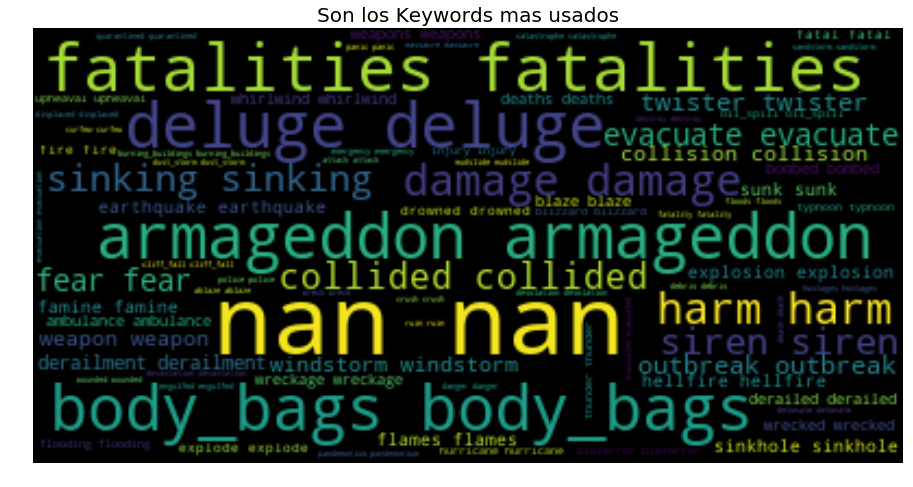

In [46]:
from wordcloud import WordCloud

text =" ".join(review for review in arch_keyword.keyword)


wordcloud = WordCloud().generate(text)


plt.figure(figsize=[16,8])
plt.title("Son los Keywords mas usados",fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [58]:
#veamos como son solo 61 nans en keyword 
arch_keyword_sinnan=archTrain[['keyword','target']]
arch_keyword_sinnan.head()

,keyword,target
0,NaN,1
1,NaN,1
2,NaN,1
3,NaN,1
4,NaN,1


In [59]:
arch_keyword_sinnan.dropna(inplace=True)
arch_keyword_sinnan.head()

,keyword,target
31,ablaze,1
32,ablaze,0
33,ablaze,1
34,ablaze,0
35,ablaze,0


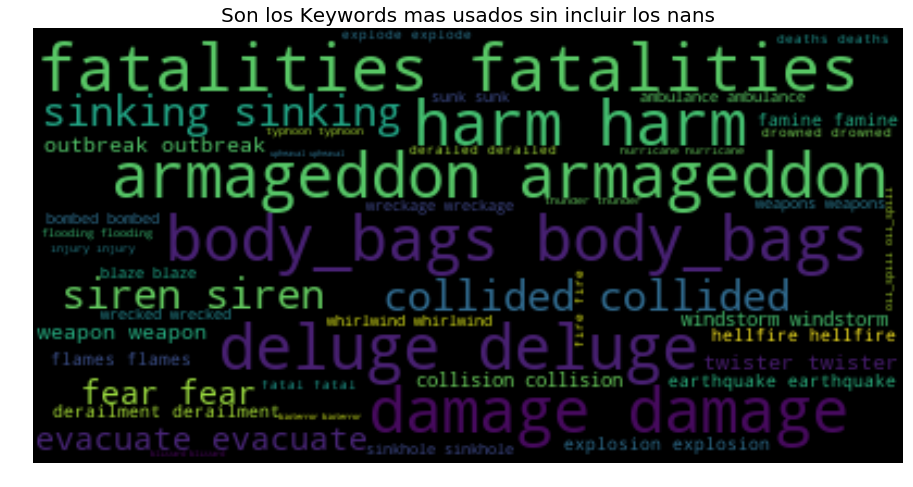

In [66]:
from wordcloud import WordCloud

text =" ".join(review for review in arch_keyword_sinnan.keyword)


wordcloud = WordCloud( max_words=200,
                          max_font_size=40, 
                          random_state=42).generate(text)


plt.figure(figsize=[16,8])
plt.title("Son los Keywords mas usados sin incluir los nans",fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [67]:
archTrain.head(50)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [68]:
text=archTrain[['text']]
text

,text
0,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...
5,#RockyFire Update => California Hwy. 20 closed...
6,#flood #disaster Heavy rain causes flash flood...
7,I'm on top of the hill and I can see a fire in...
8,There's an emergency evacuation happening now ...
9,I'm afraid that the tornado is coming to our a...
